# The analysis of Algorithms
#### 1. Rod Cutting algorithm
#### 2. Floyd-Warshall algorithm

In [225]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import networkx as nx
import matplotlib.pyplot as plt

In [227]:
# Implementation of the task of cutting the rod
# Returns the maximum revenue and optimal piece lengths
def rod_cutting(prices):
    
    n = len(prices)
    # An array for storing the maximum revenue for each length
    r = [0] * (n + 1)
    # An array for storing optimal first cuts
    s = [0] * (n + 1)
    
    for j in range(1, n + 1):
        max_val = -1
        for i in range(1, j + 1):
            if max_val < prices[i-1] + r[j-i]:
                max_val = prices[i-1] + r[j-i]
                s[j] = i
        r[j] = max_val
    
    # Restoring optimal cutting
    cuts = []
    length = n
    while length > 0:
        cuts.append(s[length])
        length -= s[length]
    
    return r[n], cuts

In [229]:
# Generating an array of prices for a rod of length n
# price_type: "random", "increasing", "decreasing"

def generate_rod_prices(n, price_type = "random"):

    if price_type == "random":
        return [random.randint(1, 100) for _ in range(n)]
    elif price_type == "increasing":
        base = [random.randint(1, 20) for _ in range(n)]
        return [sum(base[:i+1]) for i in range(n)]
    elif price_type == "decreasing":
        base = [random.randint(50, 100) for _ in range(n)]
        return sorted(base, reverse=True)

In [231]:
# Implementation of the Floyd-Warshall algorithm for finding shortest paths between all pairs of vertices
# The graph is represented as an adjacency matrix, where graph[i][j] is the weight of an edge from i to j
# If there is no edge, then a large number of floats('inf') are used

def floyd_warshall(graph):

    n = len(graph)
    # A copy of the graph for storing distances
    dist = [row[:] for row in graph]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

In [233]:
# Generating a random graph in the form of an adjacency matrix based on the number of edges

def generate_graph(n, edges, weight_range = (1, 10)):

    graph = [[float('inf')] * n for _ in range(n)]
    for i in range(n):
        graph[i][i] = 0
    
    # Generating all possible pairs of vertices (without loops)
    all_pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    max_edges = len(all_pairs)
    actual_edges = min(edges, max_edges)
    
    # Selecting random pairs to create edges
    selected_pairs = random.sample(all_pairs, actual_edges)
    # Setting weights for selected edges
    for i, j in selected_pairs:
        weight = random.randint(weight_range[0], weight_range[1])
        graph[i][j] = weight
        graph[j][i] = weight
    
    return graph

# Sparse graph generation
def generate_sparse_graph(n, weight_range = (1, 10)):
    edges = 2 * n
    return generate_graph(n, edges, weight_range)

# Medium density graph generation
def generate_medium_graph(n, weight_range = (1, 10)):
    edges = int(n * np.log2(n)) if n > 1 else n
    return generate_graph(n, edges, weight_range)

# Dense graph generation
def generate_dense_graph(n, weight_range = (1, 10)):
    max_edges = n * (n - 1) // 2
    edges = int(0.8 * max_edges)
    return generate_graph(n, edges, weight_range)

# Complete graph generation 
def generate_complete_graph(n, weight_range = (1, 10)):
    max_edges = n * (n - 1) // 2
    return generate_graph(n, max_edges, weight_range)

In [235]:
def rod_cutting_experiment(sizes):
    print("Rod Cutting experiments")
    rod_times = []
    for size in sizes:
        prices = generate_rod_prices(size)
        revenue, cuts = rod_cutting(prices)
        rod_time = measure_performance(rod_cutting, prices)
        rod_times.append(rod_time)
        print(f"Size: {size}, Max Revenue: {revenue}, Cuts: {len(cuts)}, Time: {rod_time:.6f}s")
        
    return rod_times

In [237]:
def floyd_warshall_experiment(sizes):
    print("\nFloyd-Warchall experiments")
    times_sparse = []
    times_medium = []
    times_dense = []
    times_complete = []
    
    for size in sizes:
        sparse_graph = generate_sparse_graph(size)
        time_sparse = measure_performance(floyd_warshall, sparse_graph)
        times_sparse.append(time_sparse)

        medium_graph = generate_medium_graph(size)
        time_medium = measure_performance(floyd_warshall, medium_graph)
        times_medium.append(time_medium)

        dense_graph = generate_dense_graph(size)
        time_dense = measure_performance(floyd_warshall, dense_graph)
        times_dense.append(time_dense)

        complete_graph = generate_complete_graph(size)
        time_complete = measure_performance(floyd_warshall, complete_graph)
        times_complete.append(time_complete)
        
        print(f"Size: {size}, Sparse: {time_sparse:.6f}s, Medium: {time_medium:.6f}s, Dense: {time_dense:.6f}s, Complete: {time_complete:.6f}s")
    
    return times_sparse, times_medium, times_dense, times_complete

def graph_type_comparison():

    size = 100
    graph_types = [
        ("sparse", generate_sparse_graph(size)),
        ("medium", generate_medium_graph(size)),
        ("dense", generate_dense_graph(size)),
        ("complete", generate_complete_graph(size))
    ]
    print('\nFloyd-Warshall algorithm')
    print(f"\nGraph Type comparison (Size: {size}):")
    for g_type, graph in graph_types:
        time_taken = measure_performance(floyd_warshall, graph)

        edge_count = 0
        n = len(graph)
        for i in range(n):
            for j in range(i+1, n):
                if graph[i][j] != float('inf'):
                    edge_count += 1
        
        max_possible_edges = n * (n - 1) // 2
        density = edge_count / max_possible_edges if max_possible_edges > 0 else 0
        
        print(f"{g_type:8}: Time: {time_taken:.6f}s, Edges: {edge_count:4}, Density: {density:.3f}")

In [239]:
def measure_performance(algorithm, *args, repetitions = 10):
    times = []
    for _ in range(repetitions):
        start_time = time.perf_counter()
        algorithm(*args)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    
    return sum(times) / len(times)

In [241]:
# Investigating the impact of input data type on performance
def data_type_experiment():
    
    size = 500
    price_types = ["random", "increasing", "decreasing"]
    print('\nRod Cutting with different price type')
    for p_type in price_types:
        prices = generate_rod_prices(size, p_type)
        time_taken = measure_performance(rod_cutting, prices)
        revenue, cuts = rod_cutting(prices)
        print(f"Price type: {p_type}, Time: {time_taken:.6f}s, Revenue: {revenue}, Cuts: {len(cuts)}")

In [250]:
def plot_all_results(sizes_rod, rod_times, sizes_floyd, floyd_sparse_times, floyd_medium_times, floyd_dense_times, floyd_complete_times):

    plt.figure(figsize=(15, 10))
    
    # Chart 1: Performance comparison of all algorithms (logarithmic scales)
    plt.subplot(2, 2, 1)
    plt.loglog(sizes_rod, rod_times, 'o-', label='Rod Cutting', linewidth=1, markersize=4)
    plt.loglog(sizes_floyd, floyd_sparse_times, '^-', label='Floyd-Warshall (Sparse)', linewidth=1, markersize=4)
    plt.loglog(sizes_floyd, floyd_medium_times, 'd-', label='Floyd-Warshall (Medium)', linewidth=1, markersize=4)
    plt.loglog(sizes_floyd, floyd_dense_times, 'v-', label='Floyd-Warshall (Dense)', linewidth=1, markersize=4)
    plt.loglog(sizes_floyd, floyd_complete_times, 's-', label='Floyd-Warshall (Complete)', linewidth=1, markersize=4)
    plt.xlabel('The size of the input data')
    plt.ylabel('Execution time (seconds)')
    plt.title('Performance comparison of all algorithms (logarithmic scales)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Chart 2: Performance comparison of all algorithms (linear scales)
    plt.subplot(2, 2, 2)
    plt.plot(sizes_rod, rod_times, 'o-', label='Rod Cutting', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_sparse_times, '^-', label='Floyd-Warshall (Sparse)', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_medium_times, 'd-', label='Floyd-Warshall (Medium)', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_dense_times, 'v-', label='Floyd-Warshall (Dense)', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_complete_times, 's-', label='Floyd-Warshall (Complete)', linewidth=1, markersize=4)
    plt.xlabel('The size of the input data')
    plt.ylabel('Execution time (seconds)')
    plt.title('Performance comparison of all algorithms (linear scales)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Chart 3: Floyd-Warshall separately
    plt.subplot(2, 2, 3)
    plt.plot(sizes_floyd, floyd_sparse_times, '^-', label='Sparse graph', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_medium_times, 'd-', label='Medium graph', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_dense_times, 'v-', label='Dense graph', linewidth=1, markersize=4)
    plt.plot(sizes_floyd, floyd_complete_times, 's-', label='Complete graph', linewidth=1, markersize=4)
    plt.xlabel('Number of vertices')
    plt.ylabel('Execution time (seconds)')
    plt.title('Floyd-Warshall algorithm')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Chart 4: Complexity growth analysis (logarithmic scales)
    plt.subplot(2, 2, 4)
    # Normalization of time for comparing growth rates
    if (rod_times and floyd_sparse_times and floyd_medium_times and floyd_dense_times and floyd_complete_times):
        norm_rod = [t/rod_times[0] for t in rod_times]
        norm_floyd_sparse = [t/floyd_sparse_times[0] for t in floyd_sparse_times]
        norm_floyd_dense = [t/floyd_dense_times[0] for t in floyd_dense_times]
        
        plt.loglog(sizes_rod[:len(norm_rod)], norm_rod, 'o-', label='Rod Cutting', linewidth=1, markersize=4)
        plt.loglog(sizes_floyd[:len(norm_floyd_sparse)], norm_floyd_sparse, '^-', label='Floyd-Warshall (Sparse)', linewidth=1, markersize=4)
        plt.loglog(sizes_floyd[:len(norm_floyd_dense)], norm_floyd_dense, 'v-', label='Floyd-Warshall (Dense)', linewidth=1, markersize=4)
        plt.xlabel('The size of the input data')
        plt.ylabel('Relative execution time')
        plt.title('Relative increase in execution time (logarithmic scales)')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [245]:
def analyze_results():

    print("Complexity analysis") 
    # Rod Cutting 
    for i in range(1, len(sizes_rod)):
        rod_ratio = rod_times[i] / rod_times[i-1]
        size_ratio = sizes_rod[i] / sizes_rod[i-1]
        print(f"\nIncreasing the size by {size_ratio:.1f} times:")
        print(f"Rod Cutting: the time increases by {rod_ratio:.2f} times (expecting ~{size_ratio**2:.1f})")
        
    # Floyd-Warshall
    for i in range(1, len(sizes_floyd)):
        floyd_sparse_ratio = floyd_sparse_times[i] / floyd_sparse_times[i-1]
        floyd_medium_ratio = floyd_medium_times[i] / floyd_medium_times[i-1]
        floyd_dense_ratio = floyd_dense_times[i] / floyd_dense_times[i-1]
        floyd_complete_ratio = floyd_complete_times[i] / floyd_complete_times[i-1]
        size_ratio = sizes_floyd[i] / sizes_floyd[i-1]
        
        print(f"\nFor Floyd-Warshall Increasing the number of nodes by {size_ratio:.1f} times:")
        print(f"Sparse graph: the time increases by {floyd_sparse_ratio:.2f} times (expecting ~{size_ratio**3:.1f})")
        print(f"Medium density graph: the time increases by {floyd_medium_ratio:.2f} times (expecting ~{size_ratio**3:.1f})")
        print(f"Dense graph: the time increases by {floyd_dense_ratio:.2f} times (expecting ~{size_ratio**3:.1f})")
        print(f"Complete graph: the time increases by {floyd_complete_ratio:.2f} times (expecting ~{size_ratio**3:.1f})")


Rod Cutting experiments
Size: 10, Max Revenue: 940, Cuts: 10, Time: 0.000036s
Size: 50, Max Revenue: 2700, Cuts: 50, Time: 0.000493s
Size: 100, Max Revenue: 4100, Cuts: 50, Time: 0.002084s
Size: 500, Max Revenue: 28500, Cuts: 500, Time: 0.032188s
Size: 1000, Max Revenue: 68000, Cuts: 1000, Time: 0.141037s
Size: 2000, Max Revenue: 158000, Cuts: 2000, Time: 0.541201s

Rod Cutting with different price type
Price type: random, Time: 0.027334s, Revenue: 24000, Cuts: 500
Price type: increasing, Time: 0.029041s, Revenue: 9500, Cuts: 500
Price type: decreasing, Time: 0.031374s, Revenue: 50000, Cuts: 500

Floyd-Warchall experiments
Size: 10, Sparse: 0.000279s, Medium: 0.000261s, Dense: 0.000243s, Complete: 0.000275s
Size: 20, Sparse: 0.002114s, Medium: 0.002927s, Dense: 0.005408s, Complete: 0.001870s
Size: 50, Sparse: 0.040693s, Medium: 0.029627s, Dense: 0.026125s, Complete: 0.025342s
Size: 100, Sparse: 0.266668s, Medium: 0.252097s, Dense: 0.216372s, Complete: 0.209403s
Size: 150, Sparse: 0.856

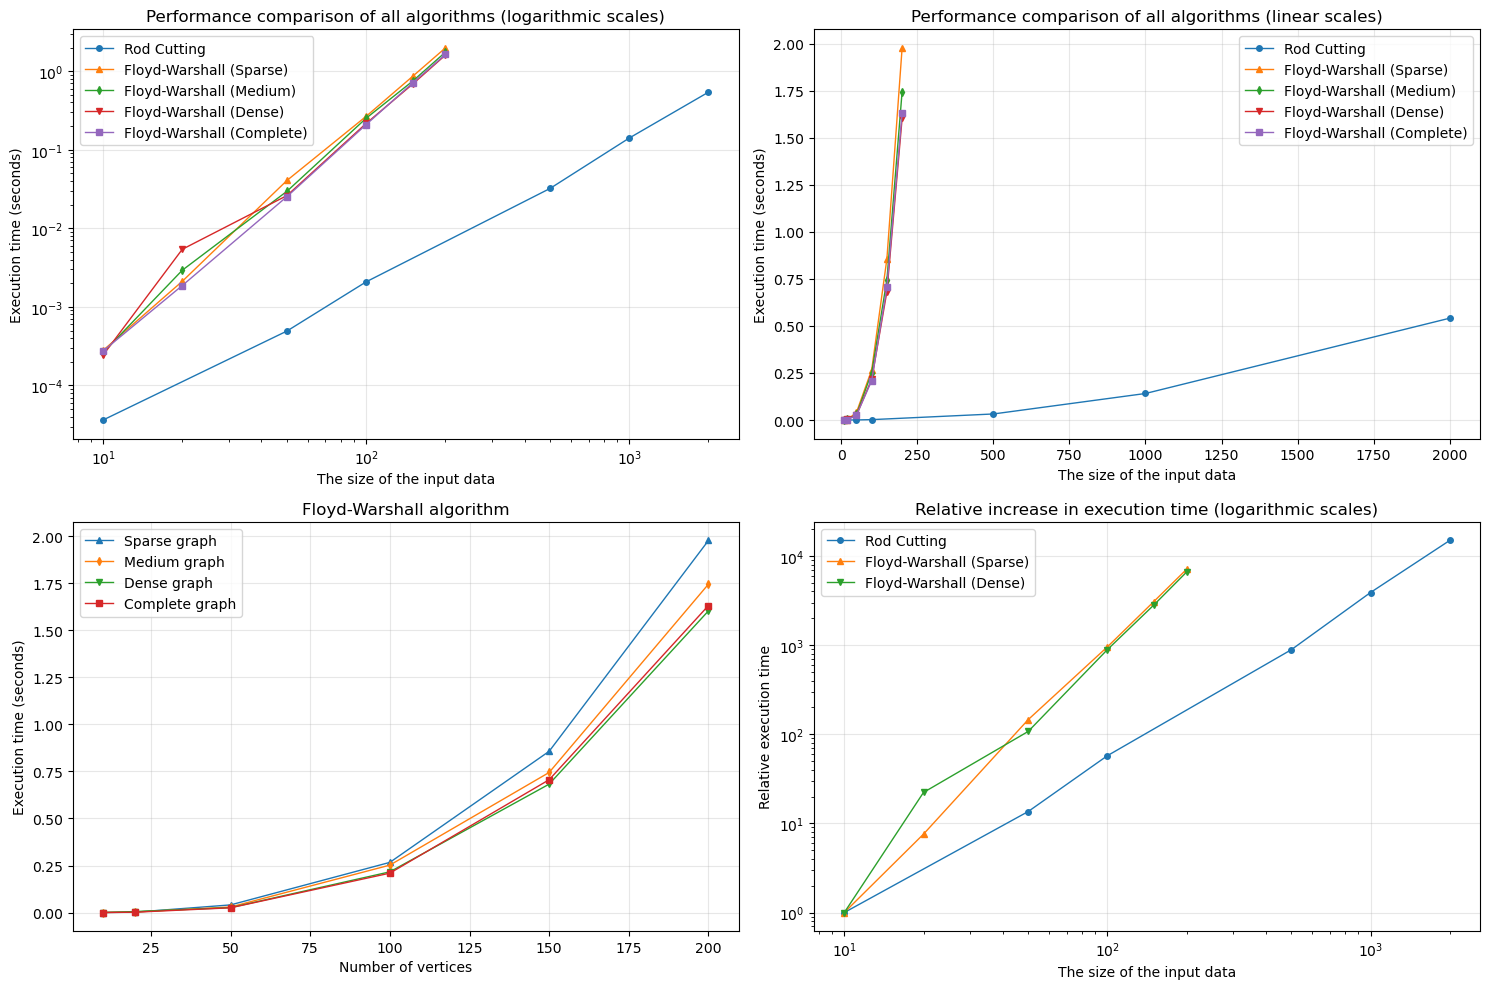

Complexity analysis

Increasing the size by 5.0 times:
Rod Cutting: the time increases by 13.58 times (expecting ~25.0)

Increasing the size by 2.0 times:
Rod Cutting: the time increases by 4.23 times (expecting ~4.0)

Increasing the size by 5.0 times:
Rod Cutting: the time increases by 15.44 times (expecting ~25.0)

Increasing the size by 2.0 times:
Rod Cutting: the time increases by 4.38 times (expecting ~4.0)

Increasing the size by 2.0 times:
Rod Cutting: the time increases by 3.84 times (expecting ~4.0)

For Floyd-Warshall Increasing the number of nodes by 2.0 times:
Sparse graph: the time increases by 7.57 times (expecting ~8.0)
Medium density graph: the time increases by 11.22 times (expecting ~8.0)
Dense graph: the time increases by 22.24 times (expecting ~8.0)
Complete graph: the time increases by 6.81 times (expecting ~8.0)

For Floyd-Warshall Increasing the number of nodes by 2.5 times:
Sparse graph: the time increases by 19.25 times (expecting ~15.6)
Medium density graph: t

In [247]:

sizes_rod = [10, 50, 100, 500, 1000, 2000]
rod_times = rod_cutting_experiment(sizes_rod)
data_type_experiment()

sizes_floyd = [10, 20, 50, 100, 150, 200]
floyd_sparse_times, floyd_medium_times, floyd_dense_times, floyd_complete_times = floyd_warshall_experiment(sizes_floyd)
graph_type_comparison()

plot_all_results(sizes_rod, rod_times, sizes_floyd, floyd_sparse_times, floyd_medium_times, floyd_dense_times, floyd_complete_times)
analyze_results()


# Results
### Rod Cutting algorithm
1. The theoretical complexity of the algorithm in terms of time spent: O(n^2), the practical results confirmed this complexity
2. The algorithm is effective because the practical values of the execution time are less or commensurate with the expected ones
3. Up to 2000 measurements algorithm time acceptable
4. Price distribution does not affect the running time of the algorithm at a fixed size
### Floyd-Warchall algorithm
1. The theoretical complexity of the algorithm in terms of time spent: O(n^3), the practical results confirmed this complexity
2. Graph density has virtually no effect on execution time, which confirms the algorithm's independence from the number of edges
